# Figures for BglB thermal stability paper 

## Summary statistics and those that don't fit neatly into categories below

+ unique positions list 
+ PyMOL commands for making a figure showing all the positions mutated 
+ list of mutants that don't express 

## Depictions of conservation across the BglB sequence 

+ percent conservation for each residue from alignment of BglB to Pfam GH1 (1,554 sequences)
+ plot of conservation across BglB sequence 
+ sequence logo 

## Visualization of functional parameters expression, Tm, kcat, KM, and kcat/KM for 125 mutants 

+ diverging color heat map 
+ compact (?) bar plots 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas
import numpy as np 
from numpy import log10, log2, inf, nan, arange, linspace 

In [3]:
df = pandas.read_csv( '../data_sets/experimental_data/data_set.csv', index_col=0, na_values='?' )

# Summary statistics and those that don't fit neatly into categories below

Number of sequence positions mutated:

In [4]:
len( df.sequence_pos.unique() ) 

68

How could you quickly select them in PyMOL? You could use: 

In [5]:
s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print( 'select all_mutants, resi', s )

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+261+293+293+293+293+293+294+294+294+295+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415+423


List of mutants that do not express:

In [6]:
df[( df.expression == 0 )].index

Index(['G12N', 'S16N', 'Q19P', 'S32L', 'W34A', 'F72H', 'R76A', 'H119E',
       'W120A', 'D121F', 'N163K', 'N163E', 'E164G', 'E164R', 'H178R', 'A236E',
       'R240E', 'A249E', 'M261D', 'N293K', 'N293D', 'Y294L', 'T296A', 'T296E',
       'H315N', 'M323K', 'W325G', 'P329N', 'F343S', 'G355A', 'H379T', 'D403A',
       'W407Y', 'W407A', 'W407Q', 'W407R', 'W407K', 'W407G', 'F415N'],
      dtype='object', name='mutant')

# Conservation along BglB sequence 

Alignment of 1554 Pfam sequences that we trimmed by hand to have catalytic residues as in previous paper 



In [7]:
dat = pandas.read_csv( 'alignment/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
print( len( dat ) )

445


In [8]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [9]:
clean_dat = dat[ aas ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 
clean_dat[ 'entropy' ] = dat.Entropy

In [10]:
print( len( clean_dat ) )
clean_dat.sample( 5 ) 

445


,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,percents,sequence_pos,entropy
amino_acid,,,,,,,,,,,,,,,,,,,,,
e,167,4,30,709,12,47,4,52,104,45,...,55,21,32,46,111,0,1,0.488629,26,NaN
i,2,30,0,1,22,0,0,565,0,532,...,6,0,5,3,239,73,2,0.359644,349,NaN
y,25,5,2,6,184,3,143,5,0,11,...,6,0,20,35,10,28,708,0.458846,18,NaN
i,30,0,56,102,8,15,27,36,59,17,...,68,41,17,188,33,1,22,0.045685,40,NaN
g,988,23,0,6,7,364,7,18,15,7,...,5,20,64,10,33,0,0,0.230234,200,NaN


In [11]:
# sorry, the above is a terrible hack

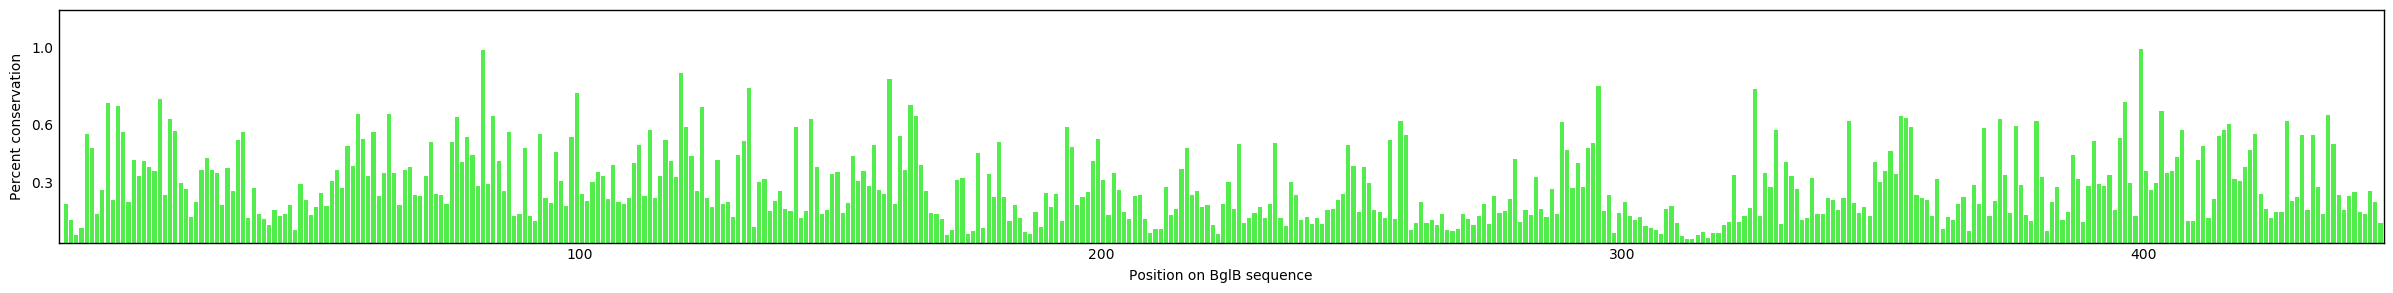

In [12]:
plt.figure( figsize=( 30, 3 ) ) 
plt.bar( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) , lw=0, color=(0.03,.9,0,0.7), label='Entropy' )

plt.xlim( 0, 446 ); plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.ylabel( 'Percent conservation' )
plt.xlabel( 'Position on BglB sequence' ) 
plt.tick_params( length=0 ) 
plt.yticks( [ 0.3, .6, 1 ] ) 
#plt.box(0)
plt.show()

In [13]:
# add the percent conserved to our dataframe for use in heat map 

my_percent_conserved = clean_dat[ [ 'sequence_pos', 'percents' ] ]
my_percent_conserved.index = my_percent_conserved.sequence_pos
my_dict = dict( my_percent_conserved.percents ) 

my_dict

{1: 0.057595392368610512,
 2: 0.026334519572953737,
 3: 0.01889763779527559,
 4: 0.0092735703245749607,
 5: 0.81195335276967928,
 6: 0.82278481012658233,
 7: 0.12653061224489795,
 8: 0.018111254851228976,
 9: 0.97104247104247099,
 10: 0.050706033376123234,
 11: 0.64769820971867009,
 12: 0.9621794871794872,
 13: 0.15930902111324377,
 14: 0.15738963531669867,
 15: 0.61583387410772228,
 16: 0.40233614536015572,
 17: 0.2046783625730994,
 18: 0.45884640311082309,
 19: 0.99028497409326421,
 20: 0.35568326947637291,
 21: 0.98849104859335035,
 22: 0.96151379089159716,
 23: 0.22065426555484285,
 24: 0.063480741797432239,
 25: 0.15975103734439833,
 26: 0.48862853204686424,
 27: 0.27194244604316548,
 28: 0.82138200782268578,
 29: 0.37219730941704038,
 30: 0.06458333333333334,
 31: 0.38386648122392214,
 32: 0.71747448979591832,
 33: 0.47770700636942676,
 34: 0.62277353689567427,
 35: 0.89108280254777072,
 36: 0.25308241401687215,
 37: 0.42012987012987013,
 38: 0.1152832674571805,
 39: 0.0778443113

In [14]:
# add the distance from active site to the dataframe 

dist = pandas.read_csv( '../data_sets/reference/distance_from_active_site.csv', index_col='name', usecols=['name', 'distance'], squeeze=True )
df[ 'distance_from_active_site' ] = dist.loc[ df.index ] 

### Depiction of expression, Tm, kcat, KM, and kcat/KM for 128 mutants 

Heat map style uses a diverging (red/blue) color map to compare the log values relative to wild type

In [37]:
df.loc[ 'BglB' ] 

sequence_pos                    NaN
expression                        1
tm                            39.93
err_tm                         0.09
k                             -1.19
err_k                          0.08
kcat                            880
err_kcat                         10
km                                5
err_km                          0.2
kcatkm                       174000
err_kcatkm                     8000
ki                              NaN
ki_percent_err                  NaN
ki_err                          NaN
gel_number                      NaN
percent_err_kcat                1.1
percent_err_km                    4
gel_comment                     NaN
distance_from_active_site       NaN
conserved                       NaN
Name: BglB, dtype: object

In [38]:
# heat map 

h_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'sequence_pos' ] 
h = df[ h_cols ].copy()

h.tm = h.tm - 39.93 
h.kcat = log10( h.kcat / 880 ) 
h.km = log10( (1/h.km) / (1/5.) )
h.kcatkm = log10( h.kcatkm / 174000 )  
h.expression = h.expression # boolean 
h['percent_conserved'] = h.sequence_pos.map( my_dict )
h.replace( [ -inf ], -5, inplace=True ) # damn son
h = h.sort_values( by='sequence_pos', ascending=True )

# sanity check: what are the WT values after this procedure?  
print( h.loc[ 'BglB' ] )

print( h.head() ) 

expression           1.0
tm                   0.0
kcat                 0.0
km                   0.0
kcatkm               0.0
sequence_pos         NaN
percent_conserved    NaN
Name: BglB, dtype: float64
        expression    tm      kcat        km    kcatkm  sequence_pos  \
mutant                                                                 
G12N             0   NaN       NaN       NaN       NaN          12.0   
S14A             1  0.23 -0.439333 -0.217484 -0.651460          14.0   
T15A             1 -0.76 -0.156314 -0.025306 -0.176657          15.0   
S16A             1 -0.52 -0.756962 -0.447468 -1.199275          16.0   
S16N             0   NaN       NaN       NaN       NaN          16.0   

        percent_conserved  
mutant                     
G12N             0.962179  
S14A             0.157390  
T15A             0.615834  
S16A             0.402336  
S16N             0.402336  


In [39]:
print( h.describe() )

       expression         tm       kcat         km     kcatkm  sequence_pos  \
count  129.000000  78.000000  75.000000  75.000000  90.000000    128.000000   
mean     0.697674  -0.521795  -0.727585  -0.164609  -1.463165    241.531250   
std      0.461056   1.842182   0.850706   0.395870   1.562764    122.181737   
min      0.000000  -5.680000  -2.944483  -1.251297  -4.240549     12.000000   
25%      0.000000        NaN        NaN        NaN        NaN           NaN   
50%      1.000000        NaN        NaN        NaN        NaN           NaN   
75%      1.000000        NaN        NaN        NaN        NaN           NaN   
max      1.000000   6.060000   1.097344   1.096910   0.955350    423.000000   

       percent_conserved  
count         128.000000  
mean            0.499220  
std             0.355953  
min             0.001263  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max             1.000000  


/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


### Color maps 

We need color maps for 

|parameter|type|range|colors|n_bins|bins|
---|---
|protein expression|binary|[0,1]|white-black|2|[0],[1]|
|tm|float|[-6,4]|purple green yellow|5|[-1,1], [1-3], [>3], [-3,-1], [<-3]|
|kcat, km, kcat/km|[-5,2]|navy gray gold|?|[-1,1], [-3,-1], [>-3], [1,3], 


In [17]:
# what if we just made a matrix with all the color values in it
# and then passed that to imshow? 

colors = [
    [ ( 0, 0, 0, x.round(2) ) for x in h[ 'percent_conserved' ] ], 
    [ ( 0, 0, 0, x ) for x in h[ 'expression' ] ], 
]
    
colors = pandas.DataFrame( colors ).T

colors.sample( 5 ) 

,0,1
43,"(0, 0, 0, 0.11)","(0, 0, 0, 1)"
84,"(0, 0, 0, 0.01)","(0, 0, 0, 1)"
114,"(0, 0, 0, 0.53)","(0, 0, 0, 1)"
13,"(0, 0, 0, 0.62)","(0, 0, 0, 0)"
56,"(0, 0, 0, 0.06)","(0, 0, 0, 1)"


In [18]:
# correlations between experimental values 
h.corr( method='pearson' )

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
expression,1.000000,NaN,NaN,NaN,NaN,-0.016775,-0.236901
tm,NaN,1.000000,-0.196967,-0.102412,-0.210011,0.139237,0.343211
kcat,NaN,-0.196967,1.000000,0.143400,0.931046,-0.195416,-0.668051
km,NaN,-0.102412,0.143400,1.000000,0.451014,0.111870,-0.163867
kcatkm,NaN,-0.210011,0.931046,0.451014,1.000000,-0.198912,-0.721499
sequence_pos,-0.016775,0.139237,-0.195416,0.111870,-0.198912,1.000000,0.024341
percent_conserved,-0.236901,0.343211,-0.668051,-0.163867,-0.721499,0.024341,1.000000


In [41]:
h[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] ].to_csv( 'targets.csv' ) 

([], <a list of 0 Text yticklabel objects>)

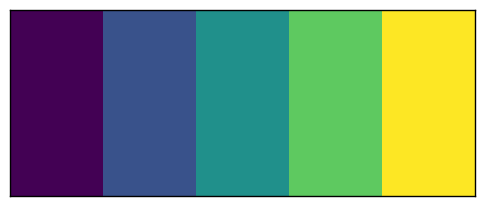

In [19]:
damn_son = np.array( [ arange( -3, 2, 1 ), arange( -3, 2, 1 ), ] )
plt.imshow( damn_son, cmap='viridis', interpolation='none' )
plt.xticks([]); plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

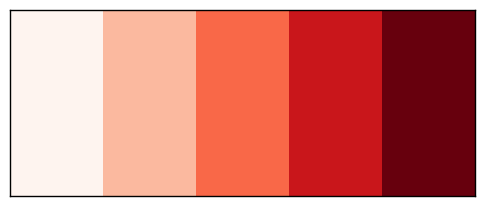

In [20]:

#plt.style.use( 'default' )
damn_son = np.array( [ arange( 1, 100, 20 ), arange( 1, 100, 20 ), ] )
plt.imshow( damn_son, cmap='Reds', interpolation='none' )
plt.xticks([]); plt.yticks([])

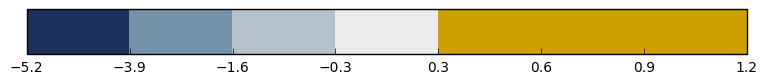

In [21]:
# color map 

from matplotlib import pyplot
import matplotlib as mpl

fig = pyplot.figure(figsize=(8, 3))
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

cmap = mpl.colors.ListedColormap([
    ( .11, .19, .36 ), # deep blue
    ( .46, .57, .66 ), # medium blue
    ( .71, .76, .80 ), # light blue 
    ( .92, .92, .92 ), # grey 
#   ( .92, .88, .74 ), # light yellow
#   ( .88, .80, .51 ), # medium yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
    ( .81, .63, 0. ),  # deep yellow 
])

cmap.set_over((1., 0., 0.)) # bright red! 
cmap.set_under(( .11, .19, .36 )) # deep blue 

#bounds = [-5.2, -3.9, -2.6, -.3, .3, .6, .9, 1.2 ]
bounds = [-5.2, -3.9, -1.6, -.3, .3, .6, .9, 1.2, ] #2.6, 3.9, 5.2 ]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, ticks=[-5, -4, -2, -3, -1, 0, 1], orientation='horizontal')
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm, orientation='horizontal')
pyplot.show()

In [22]:
my_params = { 
    'tm': {
        'cmap': 'viridis', 'vmin': -4, 'vmax': 4 , 
    }, 
    'expression': {
        'cmap': 'Greys', 'vmin': -0.2, 'vmax': 1.2 , 
    }, 
    'kcat': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'km': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'kcatkm': {
        'cmap': cmap, 'vmin': -4, 'vmax': 4 , 
    }, 
    'percent_conserved': {
        'cmap': 'Reds', 'vmin': 0, 'vmax': 1, 
    }, 
    'distance_from_active_site': {
        'cmap': 'Yellows', 'vmin': 0, 'vmax': 1, 
    }, 
}

#to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved', 'distance_from_active_site' ] )

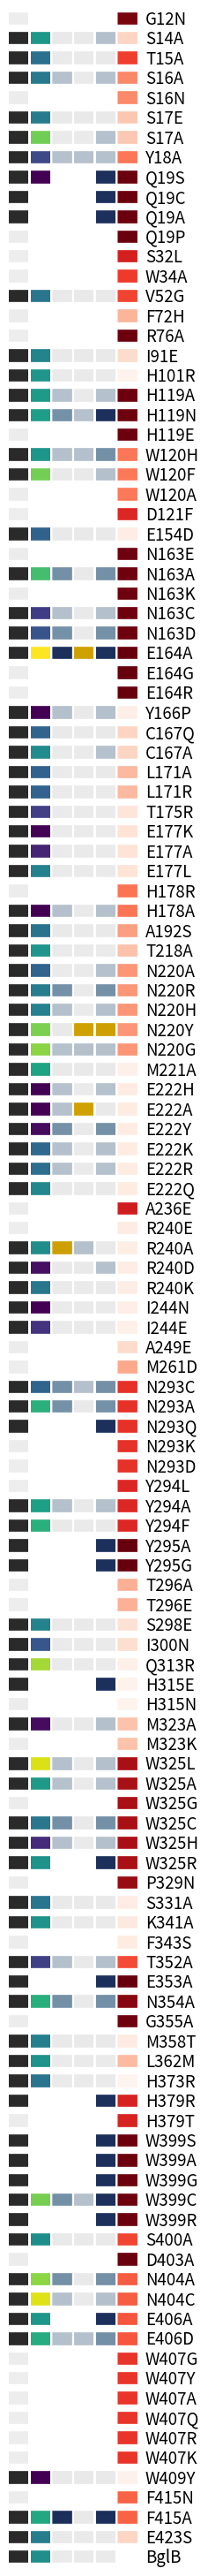

In [23]:
to_plot = enumerate( [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'percent_conserved' ] )

plt.figure( figsize=(22,90) ) 
plt.subplots_adjust( left=1., right=1.1 )

for i, col in to_plot:
    plt.subplot( 1, 9, i+3 ) 
    plt.imshow( h[ [ col ] ], interpolation='none', **my_params[ col ] )
    plt.xticks([]); plt.yticks([]) 
    plt.box( 0 ) 

    # white lines 
    plt.plot( [ -.5, .5 ], [ -0.5, -0.5 ], c='w', lw=6 ) # top line :)  
    for i, r in enumerate( h.index ):
        plt.plot( [ -.5, .5 ], [ i+0.5, i+0.5 ], c='w', lw=6 ) 
        
# this is for padding 
#plt.subplot( 1, 8, 8 )
#plt.box( 0 ) 
        
# mutant labels         
font = { 'fontsize': 15, 'fontname': 'Source Sans Pro', }
for i, r in enumerate( h.index ):
    plt.text( .9, i+0.3, r, fontdict=font )

plt.subplots_adjust(wspace=0.1, hspace=0)
#plt.savefig( 'heatmap_out.png', dpi=200 ) 

### Bar plot style 

using minimalistic bar plots, with a thick band indicating a 2-fold spread around native values. 

In [24]:
# bar plot style 

b_cols = [ 'kcat', 'err_kcat', 'km', 'err_km', 'kcatkm', 'err_kcatkm' ] 
j = df[ b_cols ].copy()
j = log10( j + 1 ) 

In [25]:
j.loc['BglB']

kcat          2.944976
err_kcat      1.041393
km            0.778151
err_km        0.079181
kcatkm        5.240552
err_kcatkm    3.903144
Name: BglB, dtype: float64

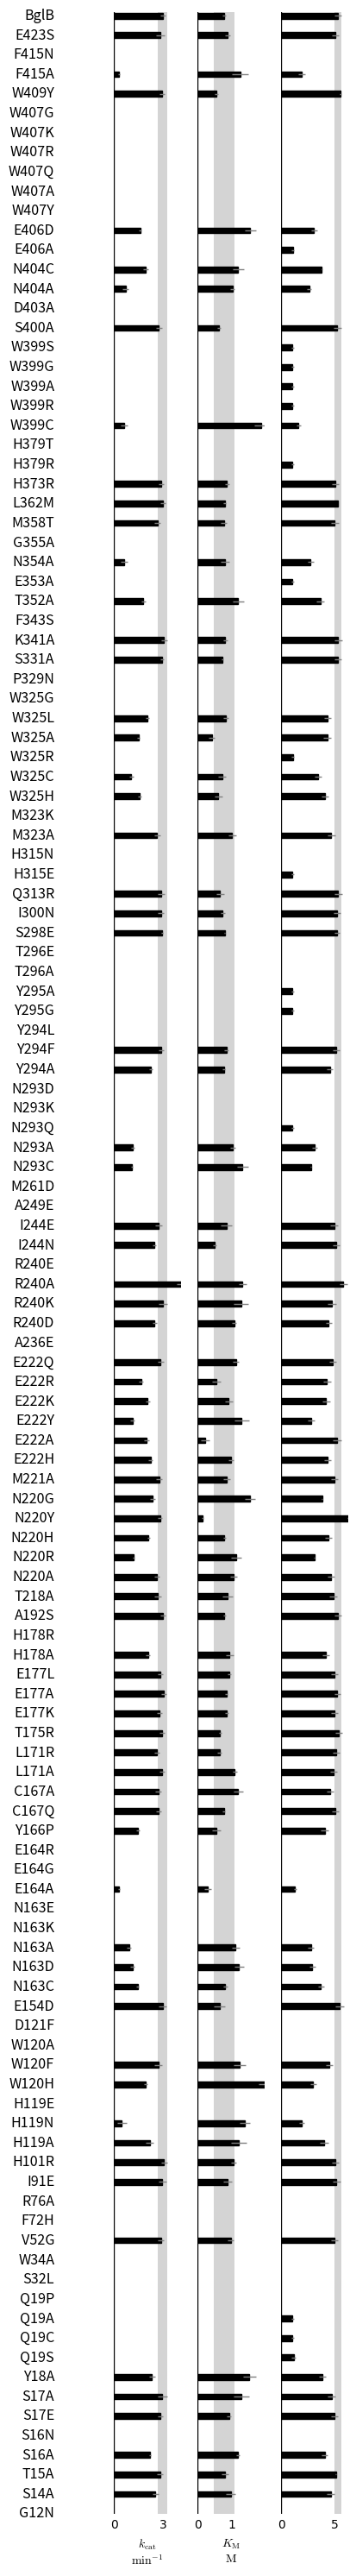

In [26]:
#http://faculty.washington.edu/stuve/log_error.pdf
#describes how to log error bars 

plt.figure( figsize=(5,30) ) 

bar_cols = [ 
    ( 'kcat', 'err_kcat', u'$k_{\mathrm{cat}}$\n$\mathrm{min}^{-1}$' ), 
    ( 'km', 'err_km', u'$K_{\mathrm{M}}$\n$\mathrm{M}$' ), 
    ( 'kcatkm', 'err_kcatkm', '' ), 
]

for i, ( col, err, fmt_str ) in enumerate( bar_cols ):
    plt.subplot( 1, 5, i+1 )
    x_vals = [ i for i in range( len( j ) ) ]
    plt.barh( x_vals, j[col], color='k', height=0.3, edgecolor=None, 
        xerr=0.434*j[err]/j[col],
        ecolor='gray', capsize=0, align='center' )
    plt.tick_params( length=0 ) 
    plt.yticks([])

    my_val = j.loc['BglB'][ col ]              
    plt.fill_between( [my_val - 0.3, my_val + 0.3], 128.2, color=(0,0,0,0.17), linewidth=0 ) 
    
    plt.xticks( [ 0, my_val.round() ] )
    plt.box( 0 ) 
    
    plt.plot( ( 0, 0 ), ( 0, 128.2 ), color='k' ) 
    plt.xlabel( fmt_str )  

for i, r in enumerate( j.index ):
    font = { 'horizontalalignment': 'right', 'fontsize': 13, 'fontname': 'Source Sans Pro', }
    plt.text( -21, i-.2, r, fontdict=font )

plt.subplots_adjust( wspace=0 )
plt.tight_layout()
#plt.savefig( 'bar_plot_out.png', dpi=600 ) 

# Statistical analysis of correlations between Tm, kcat, KM, kcat/KM, conservation, and expression in E. coli 

In [27]:
df.corr( method='pearson' ) # I love pandas

,sequence_pos,expression,tm,err_tm,k,err_k,kcat,err_kcat,km,err_km,kcatkm,err_kcatkm,ki,ki_percent_err,ki_err,gel_number,percent_err_kcat,percent_err_km,distance_from_active_site
sequence_pos,1.000000,-0.016775,0.139237,-0.033298,-0.206942,0.123561,-0.022748,-0.077412,-0.058913,-0.055469,-0.012581,-0.093172,-0.449673,-0.357858,-0.438894,0.094784,0.164913,0.016873,-0.052862
expression,-0.016775,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003658,NaN,NaN,-0.020074
tm,0.139237,NaN,1.000000,-0.163510,-0.307952,0.270659,0.021273,0.065677,0.177675,0.189751,0.081295,-0.058137,0.287233,0.223402,0.270944,0.073135,0.268277,0.023476,-0.121033
err_tm,-0.033298,NaN,-0.163510,1.000000,0.244491,0.278658,-0.152666,-0.157461,-0.107259,-0.038458,-0.143750,-0.088224,-0.286141,-0.453155,-0.279092,0.352298,0.111024,0.149269,-0.160899
k,-0.206942,NaN,-0.307952,0.244491,1.000000,-0.703039,-0.127612,-0.201375,-0.080202,-0.111265,0.105979,-0.110199,-0.129440,-0.291111,-0.097672,-0.048883,0.108377,0.030956,-0.166812
err_k,0.123561,NaN,0.270659,0.278658,-0.703039,1.000000,-0.026971,0.060676,0.088169,0.159574,-0.139429,0.013211,0.039923,-0.040114,-0.100176,0.195639,-0.065425,0.046944,-0.068862
kcat,-0.022748,NaN,0.021273,-0.152666,-0.127612,-0.026971,1.000000,0.940351,-0.002545,-0.064864,0.368608,0.466720,0.732643,0.596621,0.629324,0.041010,-0.142608,-0.143970,0.288005
err_kcat,-0.077412,NaN,0.065677,-0.157461,-0.201375,0.060676,0.940351,1.000000,0.040935,0.084959,0.295034,0.547774,0.325364,0.286529,0.284992,0.008685,-0.071779,0.069510,0.317004
km,-0.058913,NaN,0.177675,-0.107259,-0.080202,0.088169,-0.002545,0.040935,1.000000,0.810076,-0.199574,-0.185115,0.213073,0.367966,0.173731,-0.134155,0.296474,-0.022445,-0.207534
err_km,-0.055469,NaN,0.189751,-0.038458,-0.111265,0.159574,-0.064864,0.084959,0.810076,1.000000,-0.245353,-0.140062,-0.399618,-0.130367,-0.355763,-0.109617,0.389846,0.410361,-0.215347


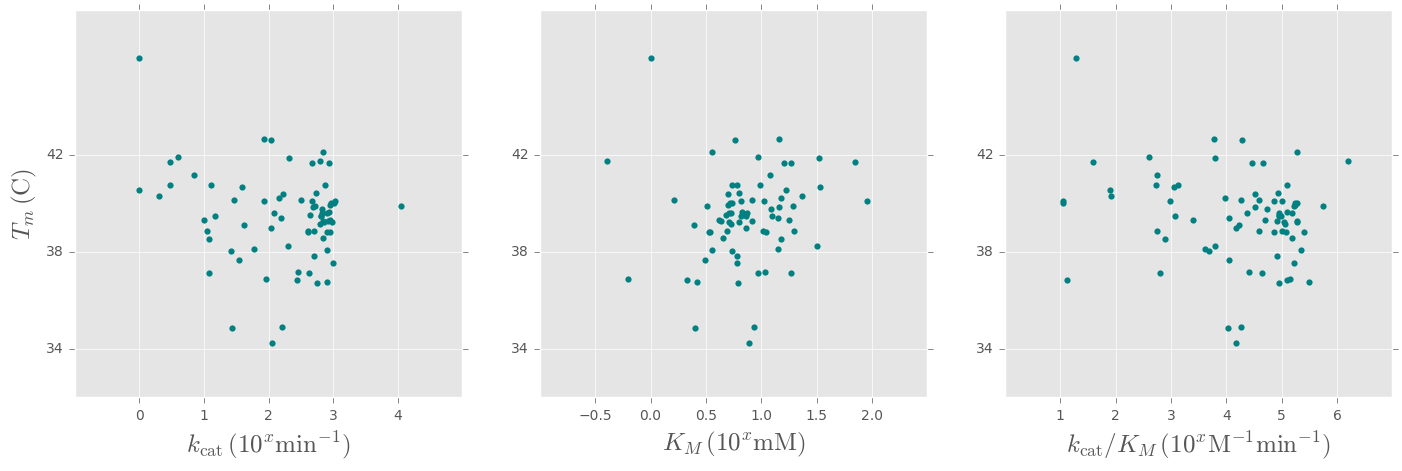

In [28]:
# kinetic constants versus tm 
plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$' ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$' ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$' ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.tm
    my_log_value = log10( native_value ) 
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    my_x_ticks = plt.xticks()[0]
    plt.xticks( my_x_ticks[1:-1] )
    plt.yticks( [ 34, 38, 42 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( '$T_m\,(\mathrm{C})$', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [29]:
# my_dict comes from a line at the very top 
# keys: sequence pos, values: percent conserved at this position
# in alignment of pfam ghf01 

df[ 'conserved' ] = df.sequence_pos.map( my_dict ) 

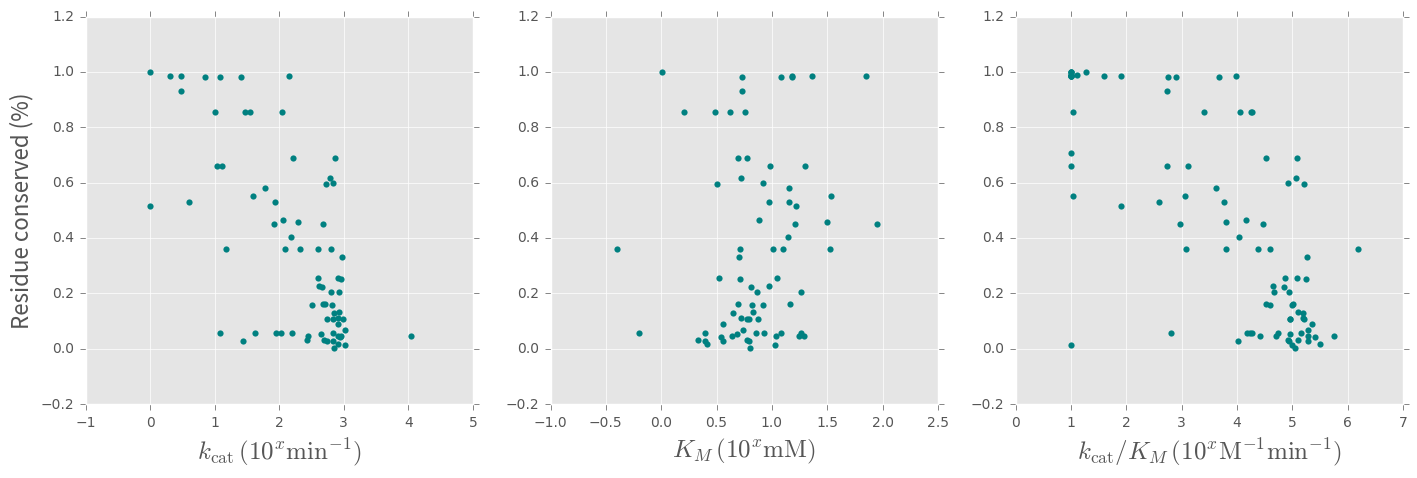

In [30]:
plt.style.use( 'ggplot' )

constants = [ 
    ( 'kcat', 880, '$k_{\mathrm{cat}}\,(10^x \mathrm{min}^{-1})$' ),
    ( 'km', 5.5, '$K_M\,(10^x \mathrm{mM})$' ),
    ( 'kcatkm', 17400, '$k_{\mathrm{cat}}/K_M\,(10^x \mathrm{M}^{-1}\mathrm{min}^{-1})$' ),
] 

plt.figure( figsize=( 17, 5 ) ) 

for idx, ( constant, native_value, fmt_str ) in enumerate( constants ):
    
    x = log10( df[ constant ] ) 
    y = df.conserved
    
    plt.subplot( 1, 3, idx+1 ) 
    plt.scatter( x, y, color='teal', lw=0 ) 
    
    #my_x_ticks = plt.xticks()[0]
    #plt.xticks( my_x_ticks[1:-1] )
    #plt.yticks( [ 34, 38, 42 ] )

    plt.xlabel( fmt_str, fontsize=18, fontname='Source Sans Pro' )
    if idx == 0:
        plt.ylabel( 'Residue conserved (%)', fontsize=18, fontname='Source Sans Pro' )
        
#plt.savefig( 'tm_versus_all.png', dpi=600 ) 

In [31]:
# mutations that reveal tradeoffs
cc = [ 'kcat', 'km', 'kcatkm' ] 
collect = []
for c in cc:
    collect.append( [
            len( h[ ( h.tm < 0 ) & ( h[c] > 0 ) ] ), 
            len( h[ ( h.tm > 0 ) & ( h[c] < 0 ) ] ), 
        ] )
    
print( collect ) 

#plt.imshow( collect, interpolation='none', cmap='Greys' )
#plt.yticks( range( len( cc ) ), cc )

[[4, 24], [15, 22], [6, 25]]


In [32]:
h[ ( h.tm > 0 ) & ( h.kcat < 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
mutant,,,,,,,
S14A,1,0.23,-0.439333,-0.217484,-0.651460,14.0,0.157390
S17A,1,1.73,-0.016087,-0.567026,-0.577999,17.0,0.204678
H119A,1,0.30,-0.789147,-0.480007,-1.263603,119.0,0.986742
H119N,1,0.38,-2.643453,-0.666892,-3.326735,119.0,0.986742
W120H,1,0.16,-1.020203,-1.251297,-2.266038,120.0,0.452652
W120F,1,1.75,-0.270541,-0.507316,-0.773178,120.0,0.452652
N163A,1,1.23,-2.099385,-0.378398,-2.493915,163.0,0.982997
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
T218A,1,0.15,-0.277965,-0.114611,-0.387582,218.0,0.222785


In [33]:
h[ ( h.tm > 0 ) & ( h.km > 0 ) ] 

,expression,tm,kcat,km,kcatkm,sequence_pos,percent_conserved
mutant,,,,,,,
E164A,1,6.06,-2.944483,0.694649,-3.961796,164.0,1.000000
N220Y,1,1.81,-0.146523,1.096910,0.955350,220.0,0.361850
Y294A,1,0.44,-0.724375,0.001741,-0.718627,294.0,0.689981
Q313R,1,2.18,-0.106263,0.145087,0.043595,313.0,0.026840
W325A,1,0.20,-1.482085,0.492144,-0.979453,325.0,0.856407


In [34]:
# single feature correlations

In [35]:
# machine learning results 

In [36]:
# data dump 

pandas.options.display.max_rows = 200

df[ [ 'expression', 'tm', 'kcat', 'km', 'kcatkm', 'conserved' ] ]

,expression,tm,kcat,km,kcatkm,conserved
mutant,,,,,,
G12N,0,NaN,NaN,NaN,NaN,0.962179
S14A,1,40.16,320.0,8.25,38823.0,0.157390
T15A,1,39.17,614.0,5.30,115849.0,0.615834
S16A,1,39.41,154.0,14.01,10997.0,0.402336
S16N,0,NaN,NaN,NaN,NaN,0.402336
S17E,1,39.47,641.0,7.32,87596.0,0.204678
S17A,1,41.66,848.0,18.45,45978.0,0.204678
Y18A,1,38.26,197.0,31.55,6230.0,0.458846
Q19S,1,36.82,NaN,NaN,13.0,0.990285
